In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# PCA - Principal Component Analysis

When dealing with text we looked at the truncated SVD algorithm that could reduce the massive datasets generated from encoding text down to a subset of features. PCA is a similar concept, we can take high dimension feature sets and reduce them down to a subset of features used for prediction. PCA is a very common method for dimensionality reduction. This is similar to what we did with the LSA algorithm, but PCA is a more general method that is commonly used outside of text processing. The motivations for the dimensional reduction techniques are the same, we want to reduce the number of features we are using to make predictions. The main motivation is to reduce the computational complexity of the model, especially when dealing with massive feature sets and big data, but it can also help with overfitting and noise in the data.

### PCA Concepts 

PCA reduces dimensionality by breaking down the variance in the data into its "principal components", then keeping only those components that do the best job in explaining said variance. Or redefining the terms on which we express the data, from its original features, into a the new "components" that we create. We can understand this well with an example, in 2D. We'll create something that looks like an example from simple linear regression type of data - we have a bunch of points, each point is located by its X and Y values. 

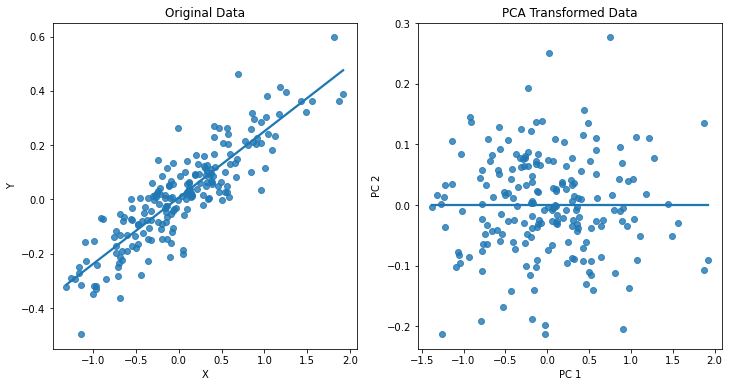

In [2]:
#make some random numbers
plt.rcParams['figure.figsize'] = 12,6
fig, ax = plt.subplots(1, 2)

X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
sns.regplot(data=X, x=X[:,0], y=X[:,1], ci=0, ax=ax[0])
ax[0].set_title('Original Data')
ax[0].set_ylabel('Y')
ax[0].set_xlabel('X')

tmpPCA = PCA(2)
tmpData = tmpPCA.fit_transform(X)
sns.regplot(data=tmpData, x=tmpData[:,0], y=tmpData[:,1], ci=0, ax=ax[1])
ax[1].set_title('PCA Transformed Data')
ax[1].set_ylabel('PC 2')
ax[1].set_xlabel('PC 1')

plt.show()

### Principal Components

In normal analysis, each of these points is defined by their X and Y values:
<ul>
<li> <b>X</b> - how far left and right the point is.  
<li> <b>Y</b> - how far up and down the point is. 
</ul>

Together these points explain all of the position data of the points. This is what we mean when referring to "explained varience" - we can explain everything about the data points by looking at X and Y. If we look at only X or only Y, each one of those features explains <i>part</i> of the varaience in the data, but not all of it.


Once we look at PCA, we can also think of these points being defined by two components:
<ul>
<li> <b>PC1</b> Along the regression line. The majority of the variance in Y is explained by the position along this line. 
<li> <b>PC2</b> Perpindicular to the regression line. Some smaller part of the variance in Y is explained by how "far off" it is from the regession line.
</ul>

In essence, we can explain the position of our points mostly by examining where it is along the regression line (component 1), along with a little info on how far off it is from that line. These two components can! explain our data - "A" amount "up and down" the line, along with "B" amount "off the line". This also explains the position of the points, but does so with different values than X and Y. For this example it pretty much means that we "rotate" the X/Y axis by about 45 degrees. 

If we look at the plot of the PCA components, PC1 (plotted as X) has a wide range, or lots of variance. PC2 (plotted as Y) has a small range, or a small amount of variance. The PC1 and PC2 components are the "principal components" of the data, and each is "made of" parts of the original features, X and Y.

![PCA](images/pca.png "PCA")

After the transformation, the new "X" axis, PC1, explains almost all of the information (i.e. the position) in the data. PC2 adds a little bit of information, but not much. In the original data we really need X and Y to reasonably explain the position of the points. In the new version, we can explain <i>most</i> of the position of the points with just PC1, and a little bit with PC2. When we have more features, this is more impactful - we can do this PCA transformation, then only hold onto the "PC1"-like components, those that do the most explaining. 

### Animated Example (Take a Moment to Look at this Page)

See: https://setosa.io/ev/principal-component-analysis/ In particular, on their UK example, it shows some data on consumption of a few food categories in the different parts of the UK. The parts are almost the same in almost all of the categorices, but when they are PCA'd into 2 components, Northern Ireland is very different from the rest. The PCA process constructs components that attempt to explain the most variance - the first component captured the differences in alcohol, potatoes, fish, and cheese. So the impact is that first component "extracted" all the data that differentiates the areas of the country - it is more efficient, in a sesnse, of embedding the things that "make a difference" than the original features. If we are using data to make predictions, such as a classification here, that is helpful. 

### PCA and Eigenvectors

The components generated by the PCA are called eigenvectors. We don't need to worry about much of the math, but this PCA can be calculated by hand with some linear math, and if you're doing so, this has more meaning. We can skip that, computers are relatively good at math. 

## PCA and Dimensionality Reduction

Once we've established the components, reducing the dimensions of our feature set is simple - just reduce the components that matter least to 0. In our example, we'd ignore the "off the line" component that is responsible for only a little bit of the position of our points, and keep the "up the line" component that explains the majority of the position of our points. 

In the XY system, both X and Y are very important in specifying where a point is, X somewhat more important than Y. In our component system, the "up the line" component provides the majority of the information on our points, with the "off the line" component only adding a little bit of info. This is the key to the dimensionality reduction - if we feature selected away the Y value, we would lose substantial information on the location of the points. If we PCA-away the "off the line" component, we only lose a small amount of information! So we can describe this data "pretty well" with only 1/2 the number of features if we describe the data with the components over the original features. When dealing with large numbers of features, this can allow us to reduce them down to a much smaller number of components, without missing out on too much information describing the real data. 

The true benefit of PCA is if there are a lot of features. We can do something like the example here to grab the "best" components, drop the rest, and have a smaller feature set with a comparable level of accuracy. 

![PCA Dimensionality Reduction](images/pca_dim.png "PCA Dimensionality Reduction")

In this example, we start with 3 dimensions, calculate the PCA components, and then drop the least important component (the one which explains the least about the data). We can see that we can still describe the data pretty well with only 2 dimensions.

#### Collinearity and Multi-colinearity

One of the other benefits of PCA is that it reduces collinearity between features. The components that PCA generates are orthogonal of each other - the collinearity is reduced to effectively 0. Since colinear features all "contain the same information", we can easily capture all that information in only one component. 

Now that we've seen a bit more of the background of gradeint descent, we can also better understand the issue that collinearity can cause for models. Having collinearity in our features won't generally cause our model to be unable to accurately predict, but it still isn't ideal. As we touched on previously, it can cause us issues in being able to determine the importance of features. In models that use gradient descent, like logistic regression, that inability to attribute importance can hider the model's ability to converge on a solution. When the gradient descent process tries to update the weights, it is attributing the total loss of the model to those individual weights. If the features are highly collinear, that attribution is less reliable, as there are several features that all "say the same thing". This can cause the process to be slower to converge on a solution, or to be subject to wild swings in the weights, as the model may attribute loss to one collinear feature or another randomly. If we remove the collinearity, our gradient descent process will typically work more quickly, and be less likely to be trapped in a local minima. 

## Dimension Reduction in Multiple Dimensions

This 2D example is simple to picture. The same concept applies when we have data with lots of dimensions. We can break the data down into components, remove the least impactful, and end up with a feature set that captures most of the variance in our target with fewer inputs. 

### Example with Real Data

This dataset is one of the sklearn samples, containing measurements from people with and without breast cancer. The classification of cancer/no cancer is the target. 

In [3]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(load_breast_cancer())
y1 = df["target"]
X1 = df.drop(columns="target")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe(include='all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Pre PCA Test

We can run a test to approximate the accuracy without doing PCA. We don't want accuracy to drop too much after the PCA process. This is our baseline. 

In [5]:
pre_model = LogisticRegression()
pre_scale = StandardScaler()
pre_pipe = Pipeline([("scale", pre_scale), ("model", pre_model)])
print("Estimated Initial Accuracy:", np.mean(cross_val_score(pre_pipe, X1, y1)))

Estimated Initial Accuracy: 0.9806862288464524


### Original Dimensionality and Correlation

One classfication target, along with 30 features. We can look for correlation between those features. This data likely has some collinearity, and we'll explore this a little bit before creating the models. 

<AxesSubplot:>

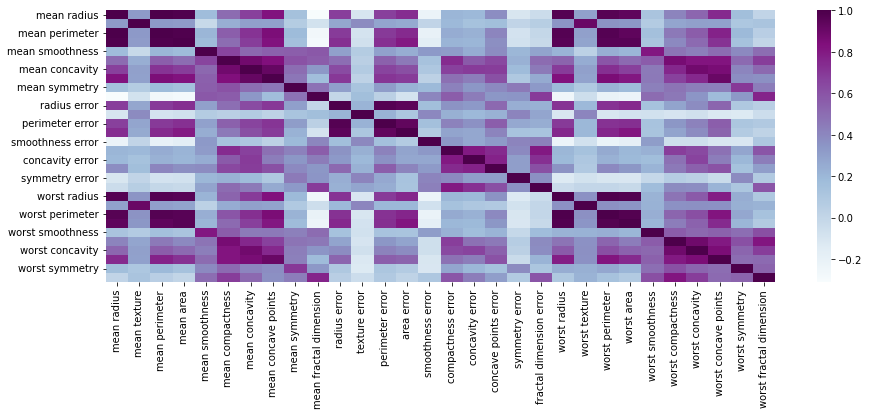

In [6]:
# Check Original Correlation
plt.rcParams['figure.figsize'] = 15,5
sns.heatmap(X1.corr(), cmap="BuPu")

In [7]:
# Calculate VIF for Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif.sort_values("VIF Factor", ascending=False).head(10)

,VIF Factor,features
0,63306.172036,mean radius
2,58123.586079,mean perimeter
20,9674.742602,worst radius
22,4487.781270,worst perimeter
3,1287.262339,mean area
23,1138.759252,worst area
9,629.679874,mean fractal dimension
29,423.396723,worst fractal dimension
4,393.398166,mean smoothness
24,375.597155,worst smoothness


#### Colinearity Results

Looks like there is a lot of correlation going on. The heatmap shows many values that are pretty correlated, and the VIF shows some really high values. Recall, values for a VIF over about 10 are really large. Since PCA will collapse the original features into newly constructed components that aim to express the same information, we can expect that the multi-colinearity will be reduced. When the components are constructed, our colinear features are all "saying the same thing", so that information from multiple features can all be embedded as the same information in the new components - we only need to "remember" that redundant information once in our new components.

### PCA and Model

For the model, we'll be sure to use a logistic regression, that is very impacted by the colinearity. Feel free to play with the number of components and observe results. Note that PCA is particularly impacted by feature scaling, so we want to be sure to scale the data for reliable results.

In [8]:
#Check accuracy 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1)
can_pca = PCA()
can_model = LogisticRegression()
can_steps = [
    ("scale", StandardScaler()), 
    ("pca", can_pca),
    ("can_model", can_model)
    ]
can_pipe = Pipeline(steps=can_steps)
can_params = {
    "pca__n_components":[5,10,15,20,25]
}

clf1 = GridSearchCV(estimator=can_pipe, param_grid=can_params, cv=5, n_jobs=-1) 
clf1.fit(X_train1, y_train1.ravel())
print(clf1.score(X_test1, y_test1))
best1 = clf1.best_estimator_
print(best1)


0.9790209790209791
Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=10)),
                ('can_model', LogisticRegression())])


### Results - Explained Variance

Accuracy looks pretty good, even though we've reduced the number of features. How is the information on our target (the variance) distributed amongst our components? We can use the explained variance ratio to see how much of the variance is explained by each component. This explained varaience is exactly what is says:
<ul>
<li> There is a total of 100% of variance in the data.
<li> Each component (feature) "explains" some percentage of that variance. Or that compenent provides X percentage of the predictive power of the model.
<li> We can add up the explained variance of all the components to get the total variance explained by the model.
<li> We will probably choose a model that is a good compromise - we want to capture a large amount of the varainace, with a smaller number of features. 
    <ul>
    <li> This will vary depending on details, but we normally want to capture at least 90% of the variance.
    <li> As a rule of thumb, we can normally do it visually by looking at where the plot "flattens" to find a good choice. 
    </ul>
</ul>

We can often find that we can capture the vast majority of the variance with a relatively small number of components, that's the magic of PCA. If we compare this to using a feature selection method to reduce the feature set down similarly, we can generally do better with PCA as we don't lose the information from features entirely. With PCA we capture the information from all of the features, transform those features into more "efficient" combinations called components, then select the most useful of those. This dimensionality reduction is normally more efficient at maximizing the "value per feature" than feature selection. If we are using PCA to make higher dimension data into something that we can visualize, we want to go down to 2 or 3 components. 

Text(0, 0.5, 'cumulative explained variance')

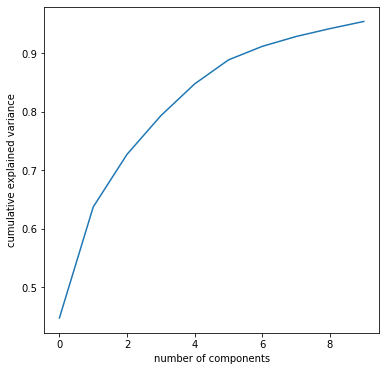

In [9]:
# Get PCA Info
comps1 = best1.named_steps['pca'].components_ 
ev1 = best1.named_steps['pca'].explained_variance_ratio_
plt.rcParams['figure.figsize'] = 6,6
plt.plot(np.cumsum(ev1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#### What is in the PCA Components?

We can also reconstruct the importance of the contributions of the different features to the components. This dataframe shows that each feature factors into the construction of each component, so we don't entirely lose any one of the features. This is a key feature of PCA, the less useful features are still captured in the components, so we aren't throwing away any information until we start removing components. The components that we remove are the ones that are similar to the PC2 from the first example, they don't add much to our predictions. 

In [10]:
labels = []
for i in range(len(comps1)):
    label = "PC-"+str(i)
    labels.append(label)

PCA1_res_comps = pd.DataFrame(comps1,columns=X1.columns, index = labels)
PCA1_res_comps.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC-0,0.219818,0.106262,0.228370,0.221616,0.138730,0.237523,0.258655,0.259411,0.135130,0.059800,...,0.226627,0.108075,0.235755,0.223193,0.122323,0.208532,0.227659,0.248632,0.117017,0.127062
PC-1,-0.229414,-0.059406,-0.210024,-0.228431,0.196455,0.159124,0.054628,-0.037227,0.190613,0.365925,...,-0.216826,-0.035913,-0.195745,-0.218083,0.194460,0.166989,0.112127,-0.004742,0.161446,0.293844
PC-2,-0.032473,0.073482,-0.030567,0.009543,-0.065465,-0.056214,-0.008757,-0.036987,0.004103,0.012470,...,-0.069072,-0.038699,-0.068335,-0.029935,-0.220933,-0.223165,-0.180928,-0.182908,-0.230110,-0.211190
PC-3,0.037223,-0.595010,0.039465,0.053305,0.179006,0.047548,0.026597,0.068790,0.040297,0.073202,...,0.010110,-0.628028,0.010415,0.022629,0.026079,-0.087031,-0.067048,-0.001247,-0.074425,-0.066907
PC-4,0.033111,-0.026586,0.033817,0.006435,-0.358426,0.020359,0.076716,-0.042985,-0.339126,-0.031451,...,-0.017896,-0.097332,-0.004800,-0.039860,-0.337587,0.103272,0.159761,0.029476,-0.315074,0.074352


### Results and Use of PCA

PCA allows us to reduce down the original 30 feature set to a much smaller number, while still making accurate predictions. In this case, it looks like we can get about 90% of the explained varaiance in the data by using around 6 or so components. Yay, that's cool! In very high dimension data, this can make a big difference, models with thousands or more features can take a long time to train and require more data to combat overfitting. PCA is very commonly used in many applications. In addition to the feature set size reduction, PCA also provides:
<ul>
<li> <b>Noise reduction</b> - data that is "noisy", or data that has a lot of random variation can be helped by PCA. The reduction in dimensionality can help to reduce the noise, and the components are constructed to capture the most important information, so the noise is reduced.
<li> <b>Reduces Overfitting</b> - PCA also helps fight overfitting. We are removing the least valuable information (not necissarily the most valuable <i>features</i>) from the dataset and leaving only the most important. 
</ul>

In addition to the general applicability of PCA when dealing with large datasets, PCA is also used in many other applications:
<ul>
<li> <b>Visualization</b> - PCA can be used to reduce the dimensionality of data so that it can be visualized. This is a common use case for PCA, and is often used in conjunction with clustering to visualize clusters in high dimensional data.
<li> <b>Feature Extraction</b> - PCA can be used to extract features from data. 
<li> <b>Image Compression</b> - PCA can be used to compress images, though there are other methods that are more efficient for this purpose.
<li> <b>High Dimension, Low Sample Size</b> - PCA can be used to reduce the dimensionality of data when there are a lot of features, and not a lot of data - a scenario that leads to overfitting. In particular, things like genetic data might contain a huge number of features (tens of thousands, or more), but not a lot of data (a few thousand patients is quite a lot for most studies).
</ul>

#### Limitations of PCA

PCA is a great tool, but it does have some limitations. These limitations are generally things that we can overcome:
<ul>
<li> PCA is a linear transformation, so it can't capture non-linear relationships.
<li> PCA is also sensitive to scale, so we need to scale our data before using it.
<li> PCA is also sensitive to outliers, so we should be careful to remove outliers before using it.
<li> PCA does lose some information, we just minimize it. 
</ul>

<b>Note:</b> large models like chatGPT, image recognition neural networks, etc... do have a huge number of features, but they also have massive datasets on which to train and effectively unlimited compute power.

### PCA and Feature Selection/Extraction

PCA is not (technically) a feature selection technique. PCA does do a similar thing to feature selection in reducing the size of our feature set that goes into a model, but it is different. Feature selection removes features. PCA removes components, that are created from features, but that are not, themselves, features. In PCA, the features are being transformed for the components to be created, and each component includes portions of multiple features - for example, in the scatter plot above, both the "up the line" and "off the line" components contain parts of the X and Y features. If we drop the "off the line" feature when doing PCA we aren't really eliminating any features - we still need X and Y to calculate each of our components. In the breast cancer example, each of those features still contributes to the components, but the actual predictors are far reduced. 

PCA is providing us with a version of feature extraction - we take the original features, run them through PCA, and construct a new set of features that are the components. We can then use those components as features in a model. The impact on the model is similar in a key way, both methods reduce the number of features that go into the model, and will make training faster. We can still feature select prior to applying PCA, but we can't feature select after PCA since each component is a combination of all the features. Pre-PCA feature selection is not uncommon, but we need to use our judgement - if there are features that are "bad", with many errors, inconsistencies, or missing values, then selecting them out will likely help. If we have features that are just a little less useful, then that's a prime application for PCA, we can pull out the most useful information of those semi-useful features through PCA, then drop the less useful information as we remove the least useful components. PCA will tend to be more efficient at keeping the useful information in the data that we feed the model than feature selection will.

## Exercise - Predict the Outcome

Predict if people have diabetes (Outcome) using PCA to help. 

In [11]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#Get data
y = df["Outcome"]
X = df.drop(columns={"Outcome"})
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Model and grid search of components. 
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pca_dia = PCA()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca_dia), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [2,4,6,8]
}

grid = GridSearchCV(pipe, param_grid, n_jobs=4)
grid.fit(X_train, y_train)
best2 = grid.best_estimator_
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.774):
{'pca__n_components': 8}


#### Plot Component Importance

We can plot the effectiveness with different numbers of components. 

Text(0, 0.5, 'cumulative explained variance')

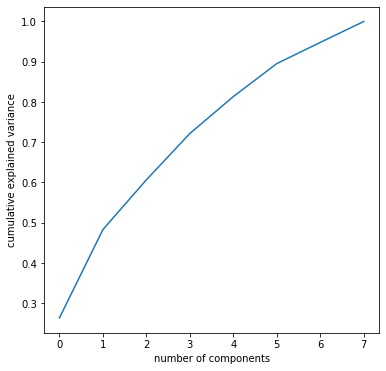

In [13]:
comps2 = best2.named_steps['pca'].components_ 
ev2 = best2.named_steps['pca'].explained_variance_ratio_
plt.rcParams['figure.figsize'] = 6,6
plt.plot(np.cumsum(ev2))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## PCA with Images - Big Dimensions!

One common example of something with a large feature set is images - even our simple set of handwritten numbers had 784 features for each digit. Generating models from all 70,000 of those simple images could take forever, and those are about the most simple images we can imagine! Reducing the dimensions of very large images can be highly beneficial, especially if we can keep the useful bits that we need to do identification. Previously with the minst digits we used feature selection to drop some less useful pixels - likely those around the edges that didn't change from image to image. In real images, we generally don't have those consistent dead zones, so using PCA will hopefully give us a way to get the best of both worlds. We capture the information from all pixels in our components, then we drop the least useful components - never entirely losing any of the pixels. 

### Faces, PCA, and You

This dataset is a more complex set of images than the digits we used previously. It is a set of a bunch of faces of past world leaders, our goal being to make a model that will recognize each person from their picture. 

In [14]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Starting Dimensions and PCA Dimensions

We start with ~1350 images, each 62 x 47 pixels, color depth of 1 - resulting in a feature set that is around 3000 columns wide. We can fit the data to a PCA transformation, and chop the feature set down to a much smaller number of components, we'll try two values - 15 and 150 components. 

In [15]:
# Generate PCA and inversed face-sets
pca150 = PCA(150).fit(faces.data)
components150 = pca150.transform(faces.data)
projected150 = pca150.inverse_transform(components150)

pca15 = PCA(15).fit(faces.data)
components15 = pca15.transform(faces.data)
projected15 = pca15.inverse_transform(components15)

### Picture Some Pictures

We can look at what the pictures look like in their original state, and after the PCA process has reduced their dimensions by various amounts. Note the impact that the PCA reduction has - we don't lose any specific part of the image, it just kind of "degrades" as we allow more information to be discarded. 

Text(0, 0.5, '15-dim')

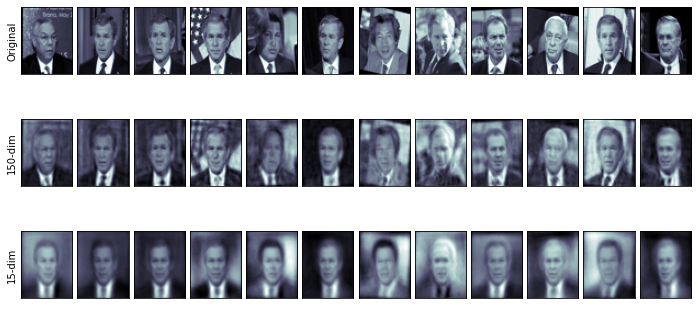

In [16]:
# Plot faces and PCA faces
fig, ax = plt.subplots(3, 12, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0,i].imshow(faces.data[i].reshape(62, 47), cmap='bone')
    ax[1,i].imshow(projected150[i].reshape(62, 47), cmap='bone')
    ax[2,i].imshow(projected15[i].reshape(62, 47), cmap='bone')

ax[0, 0].set_ylabel('Original')
ax[1, 0].set_ylabel('150-dim')
ax[2, 0].set_ylabel('15-dim')

### Amount of Variance Captured in Components

We can look at our PCA'd data and see that while the images are much less clear and defined, they are pretty similar on the whole! We can probably still do a good job of IDing the people, even though we have roughly 1/20 (or 1/200) the number of features as we started with. Cool. Even with the 15 component set, the images are still somewhat able to be recognized. If you recall when we did some feature selection on digits, we were able to select out several features - the ones that were around the edges of the images that never change (vary) from image to image. If we tried that here, we would still be able to trim it a bit, maybe in the corners, but these images have more "stuff" in them, dropping a large number of pixels would likely remove some pixels that we actually kind of need to ID the people.

The PCA allows us to call up the details on how much of the variance was captured in each component. The first few contain lots of the useful info, once we reach 20 components we have about ~75% or so of the original varaince. If we draw a cutoff line on the plot at 90% of the variance, we can see that we can get there with about 80 or so components. So, from 3000 features to 80, with only about a 10% loss in the predictive information of our data. Not bad.

Text(0, 0.5, 'cumulative explained variance')

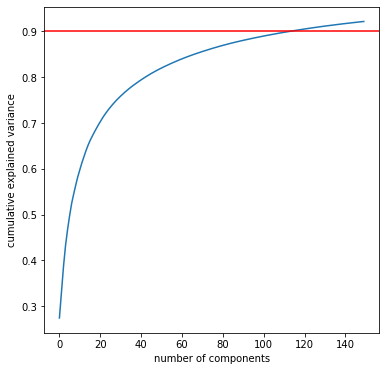

In [17]:
plt.plot(np.cumsum(pca150.explained_variance_ratio_))
plt.axhline(0.9, c='r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Scree Plot and Number of Components

One question we're left with is how many components should we keep? This answer varies, common suggestions are enough to capture somewhere around 80% to 95% of the explained variance. These metrics are somewhat arbitrary - testing different numbers of components will likely make sense in many cases. 

One method to choose the number of features is a scree plot. This is a plot that shows the contribution of each component. The scree plot shows the same information as the graph above, but formatted differently. The idea of a scree plot is to find the "elbow", or where the plot levels out. This flattening point is approximately where you should cut off the number of components - the idea being that you capture all the components that make a substantial difference, and let the ones that make a small difference go. The big difference between this one and the plot above is that this one shows the explained variance for each component, so we are looking for a point where that component's contribution is very low.

Personally, I think the cumulative plot above is easier to view and understand, but scree plots are pretty common. 

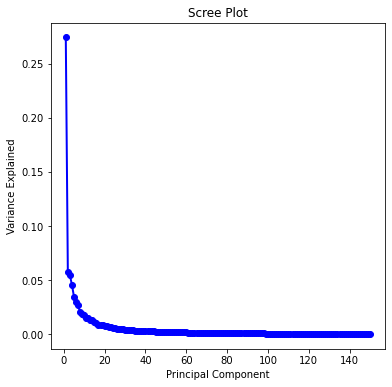

In [18]:
#Scree Plot
PC_values = np.arange(pca150.n_components_) + 1
plt.plot(PC_values, pca150.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### Predictions with PCA

We can try to make some predictions and see what the results are with PCA'd data. We'll use a multinomial HP to tell our regression to directly predict multiple classes with our friend the softmax. 

In [19]:
#Get data
y = faces.target
X = faces.data
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Model and grid search of components. 
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1, multi_class="multinomial")
pca_dia = PCA()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca_dia), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [20, 80, 130, 200]
}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(X_train, y_train.ravel())
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print("Test Score:", grid.score(X_test, y_test))

Best parameter (CV score=0.821):
{'pca__n_components': 200}
Test Score: 0.8189910979228486


## Exercise - Kernel PCA

Similarly to support vector machines, we can use a kernel transformation to make PCA better suit data with non-linear relationships. The concept is the same as with the SVMs - we can provide a kernel that does a transformation, then the linear algebra of PCA can be executed on the transformed data.  The implementation is very simple - we replace PCA with KernelPCA, and provide the kernel we want to use - almost exactly like we did with the SVM. This brings us to the fact that PCA is a linear model, as you may have guessed from its linear algebra roots. Like other linear models, it does a good job with things that have near-linear relationships, but it can struggle with other data. If our PCA is not delivering good results, we can try the KernelPCA to see if it helps to provide a non-linear transformation in the form of a kernel, again, just like we did with the SVM. In practice, this is a good thing to try if our PCA components are doing a poor job of explaining the variance in a smaller number of features. As we can see above though, PCA is often pretty good, so we can save this for when we need it. In several executions of this example, the Kernel PCA generally did roughly the same or worse than the regular PCA, usually with a polynomial kernel with a power of 2 or 3.

We can see if a different kernel is better than the original... Try with a grid search of the different kernels other than linear. Also, for the polynomial kernel, try with multiple values in the grid search. Documentation is: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html The key part that you probably want to change is the kernel parameter, the options are much like the SVM models - poly, rbf, sigmoid, and cosine. Try a grid search to select the best kernel. 

In [20]:
# Use Kernel PCA
from sklearn.decomposition import KernelPCA

#Get data
y = faces.target
X = faces.data
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Model and grid search of components. 
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=100000, tol=0.1, multi_class="multinomial")
pca_dia = KernelPCA()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca_dia), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [20, 80, 130, 200],
    "pca__kernel": ["poly", "rbf", "sigmoid", "cosine"],
    "pca__degree": [2,3,4,5,6]
}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(X_train, y_train.ravel())
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print("Test Score:", grid.score(X_test, y_test))

Best parameter (CV score=0.700):
{'pca__degree': 2, 'pca__kernel': 'poly', 'pca__n_components': 200}
Test Score: 0.7329376854599406


## Sparse PCA

Sparse PCA is another implementation of PCA that includes L1 regularization - resulting in some of the values being regularized down to 0. The end result of this is that you end up with a subset of the features being used to construct the components. The others are feature selected out just like Lasso rregression. This can act as a sort of all-in-one feature selection and dimensionality reduction technique - we filter out the least important features, than construct our smaller number of components from the selected remaining features. Like with the lasso regression, the alpha parameter controls how much regularization is applied; the larger the value, the more aggressive the regularization, and the more features will be dropped.

## 稀疏主成分分析

稀疏 PCA 是 PCA 的另一种实现，其中包括 L1 正则化 - 导致某些值被正则化为 0。最终结果是您最终得到用于构造组件的特征子集。其他的都是像 Lasso rregression 一样的特征选择出来的。这可以作为一种一体化的特征选择和降维技术——我们过滤掉最不重要的特征，而不是从选定的剩余特征中构建我们较少数量的组件。与套索回归一样，alpha 参数控制应用正则化的程度；值越大，正则化越激进，丢弃的特征越多。

In [21]:
from sklearn.decomposition import SparsePCA

sPCA = SparsePCA(15, alpha=.5)
sparse = sPCA.fit_transform(X1)

comps3 = sPCA.components_ 
labels = []
for i in range(len(comps3)):
    label = "PC-"+str(i)
    labels.append(label)

PCA3_res_comps = pd.DataFrame(comps3, columns=X1.columns, index = labels)
PCA3_res_comps.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC-0,0.000429,0.0,0.002413,0.433504,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.018867,0.900709,0.0,0.0,0.000000,0.000000,0.0,0.0
PC-1,0.000000,0.0,0.000000,0.969106,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.023397,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
PC-2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000055,0.00000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
PC-3,0.000000,0.0,0.000000,0.000000,0.0,0.007215,0.229545,0.00987,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.965967,0.118608,0.0,0.0
PC-4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


#### L1 Feature Selection

We can look at the list of features that were selected by the lasso regularization, those that are all 0s here are the ones that were dropped. From this point out, it is regular modelling from our PCA'd dataset. 

In [22]:
PCA3_res_comps.describe().T.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
worst perimeter,15.0,-0.065079,0.257316,-0.995053,0.0,0.0,0.000000,0.018867
mean perimeter,15.0,-0.048677,0.234259,-0.861902,0.0,0.0,0.000000,0.226811
worst radius,15.0,-0.022383,0.104820,-0.399746,0.0,0.0,0.000000,0.027663
mean radius,15.0,-0.020864,0.080586,-0.311974,0.0,0.0,0.000000,0.007003
perimeter error,15.0,-0.005770,0.075287,-0.245531,0.0,0.0,0.000000,0.130030
worst smoothness,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
fractal dimension error,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
symmetry error,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
concave points error,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
concavity error,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
